# 

# 
Developed as part of European Union Horizon 2020 programme funded SCALE-UP project (grant agreement no. 955332).

## Import libraries, functions and constants

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from utils import (
    compare_test_with_predicition,
    fit_model,
    get_filtered_merged_data,
    get_pipeline,
    predict,
    draw_results,
    print_results,
    BASE,
    MINUS_10,
    MINUS_20,
    ZERO,
    PLUS_10,
    PLUS_20,
    DRY_WEATHER,
    SEASONABILITY_COLUMNS,
    RAIN,
    TEMPERATURE,
    YEAR,
)



## Load and prepare data

In [2]:
df_base, df_rain_train, df_temperature_train = get_filtered_merged_data("../data/parkings_small.csv")

Found 718955 parkings in zone


## Create pipelines and train models

#

mean squared error: 3743.9170030666596
mean squared error: 3769.0725983800608
mean squared error: 3272.6115138854166


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['hour', 'month',
                                                   'dayofweek']),
                                                 ('Standard', StandardScaler(),
                                                  ['temperature', 'year'])])),
                ('regressor',
                 MLPRegressor(alpha=0.01, early_stopping=True,
                              hidden_layer_sizes=(50, 25, 10), max_iter=2000,
                              random_state=42))])

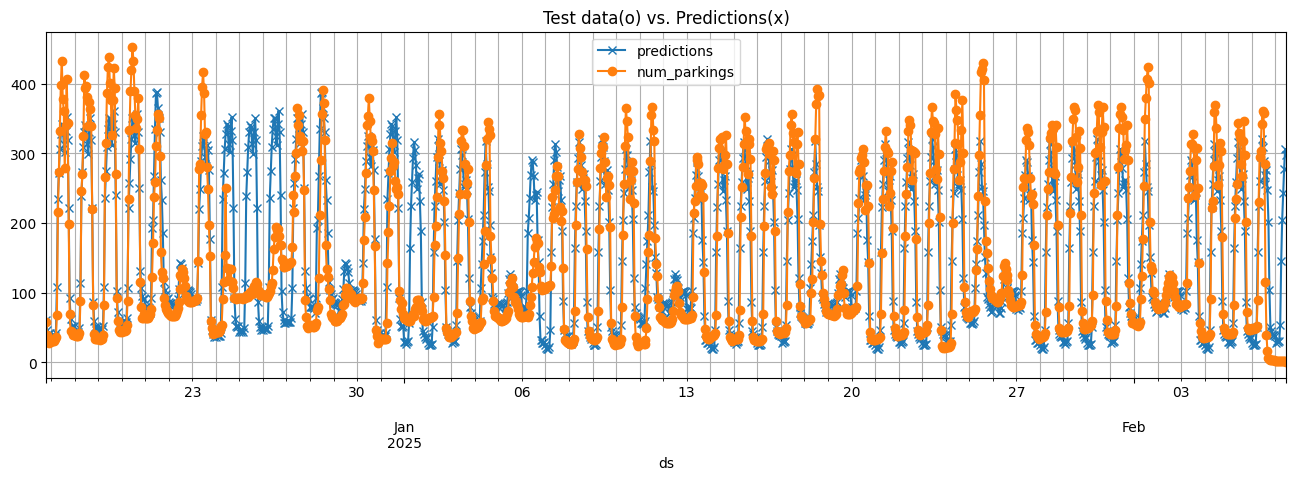

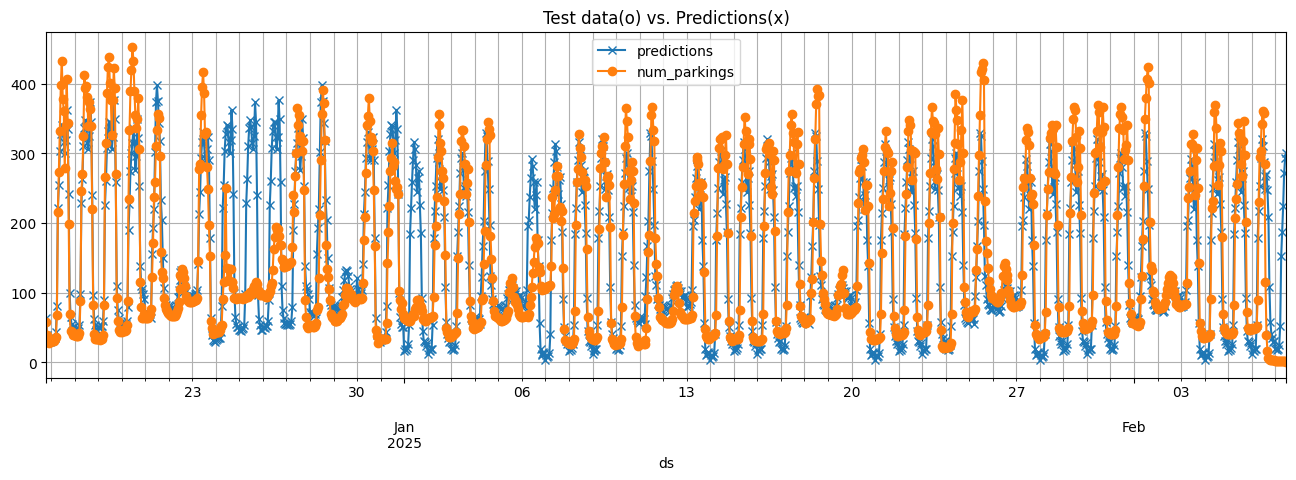

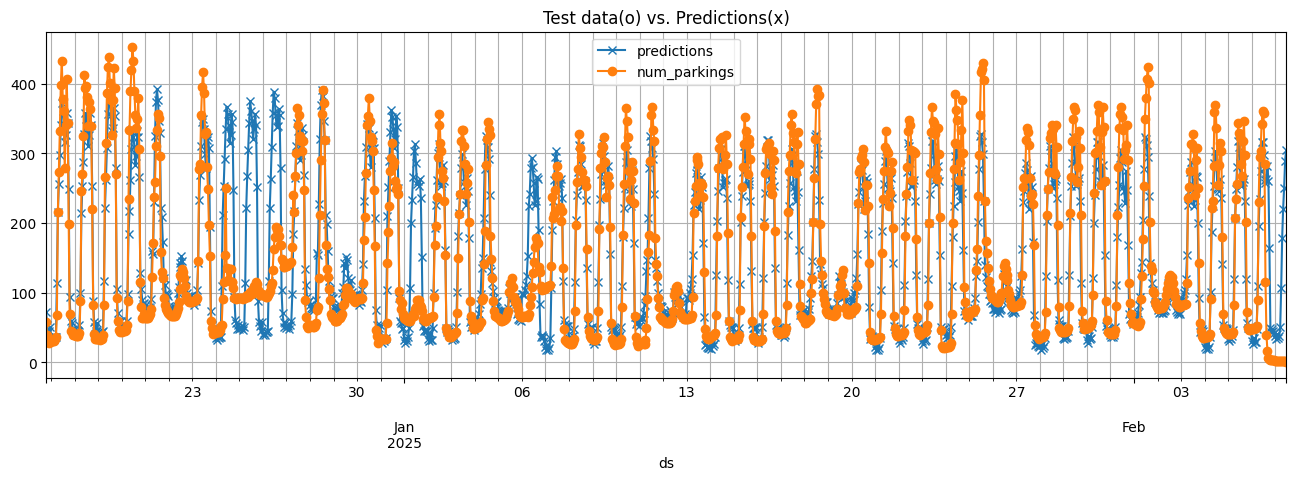

In [3]:
model = MLPRegressor(
    hidden_layer_sizes=(50,25),  
    activation="relu",         
    solver="adam",
    learning_rate="constant",               
    max_iter=500,              
    random_state=42,
    alpha=0.01,
    early_stopping=True,
)
pipeline = get_pipeline(model, standard_columns=[YEAR])
X_test, y_test = fit_model(pipeline, df_base, SEASONABILITY_COLUMNS)
compare_test_with_predicition(pipeline, X_test, y_test)

model = MLPRegressor(
    hidden_layer_sizes=(50,25),  
    activation="relu",          
    solver="adam",
    learning_rate="constant",             
    max_iter=2000,               
    random_state=42,
    alpha=0.01,
    early_stopping=True,
)
pipeline_rain = get_pipeline(model, standard_columns=[YEAR, RAIN])
X_test, y_test = fit_model(pipeline_rain, df_rain_train, SEASONABILITY_COLUMNS+[RAIN])
compare_test_with_predicition(pipeline_rain, X_test, y_test)

model = MLPRegressor(
    hidden_layer_sizes=(50,25, 10),     
    activation="relu",          
    solver="adam",
    learning_rate="constant",             
    max_iter=2000,               
    random_state=42,
    alpha=0.01,
    early_stopping=True,
)
pipeline_temperature = get_pipeline(model, standard_columns=[TEMPERATURE, YEAR])
X_test, y_test = fit_model(pipeline_temperature, df_temperature_train, SEASONABILITY_COLUMNS+[TEMPERATURE])
compare_test_with_predicition(pipeline_temperature, X_test, y_test)

## Make predictions

Forecast period: 2025-02-07 11:00:00 - 2025-03-09 11:00:00
Base forecast for parkings: 100011.
Forecast for parkings in rain: 122601.  Diff to base 22590
Forecast for parkings in dry weather: 98001.  Diff to base -2010
Forecast for parkings in -20 degrees temperature: 108763.  Diff to base 8752
Forecast for parkings in -10 degrees temperature: 101405.  Diff to base 1394
Forecast for parkings in 0 degrees temperature: 101196.  Diff to base 1185
Forecast for parkings in 10 degrees temperature: 105040.  Diff to base 5029
Forecast for parkings in 20 degrees temperature: 107089.  Diff to base 7078


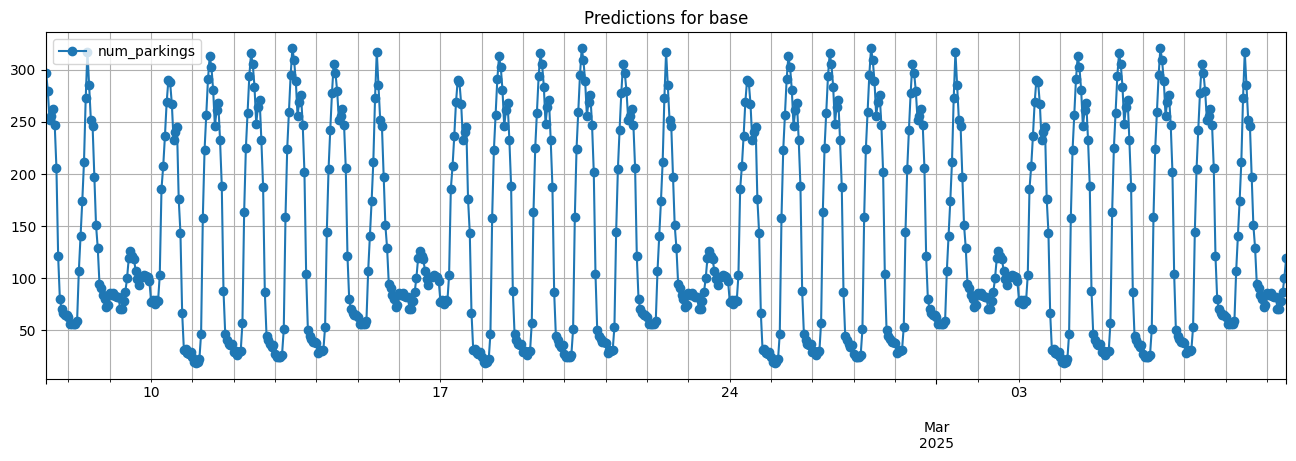

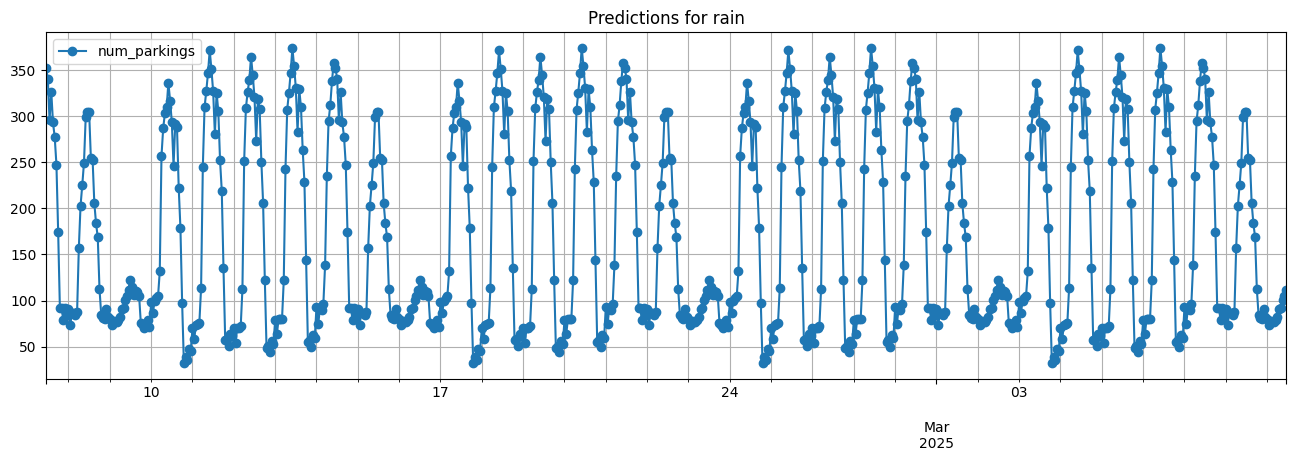

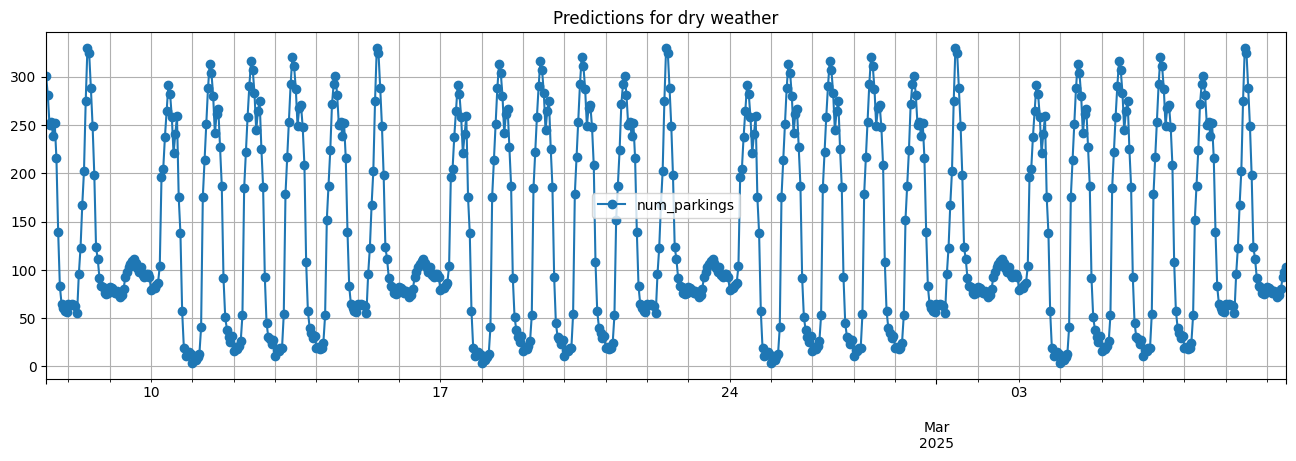

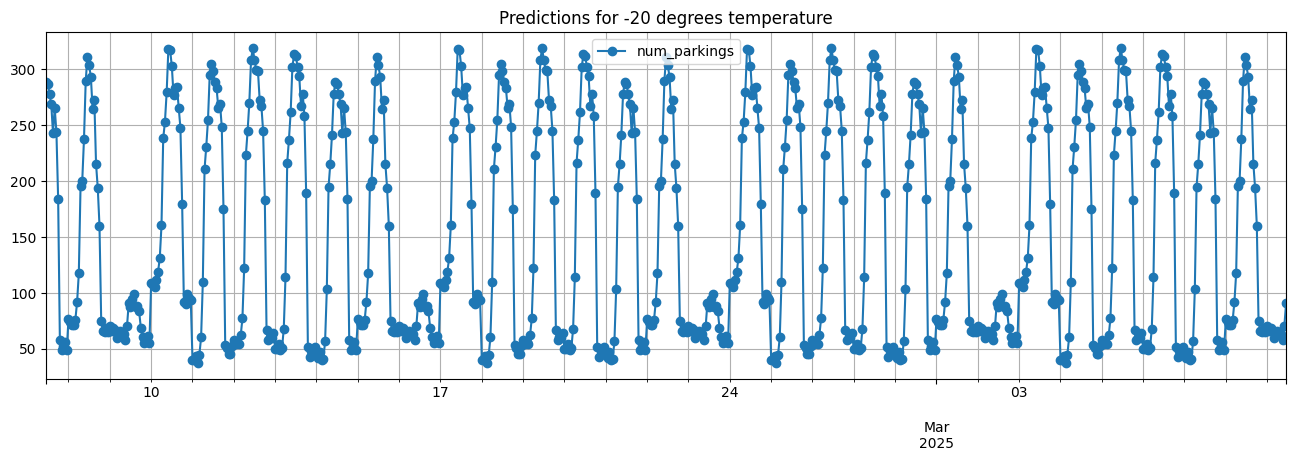

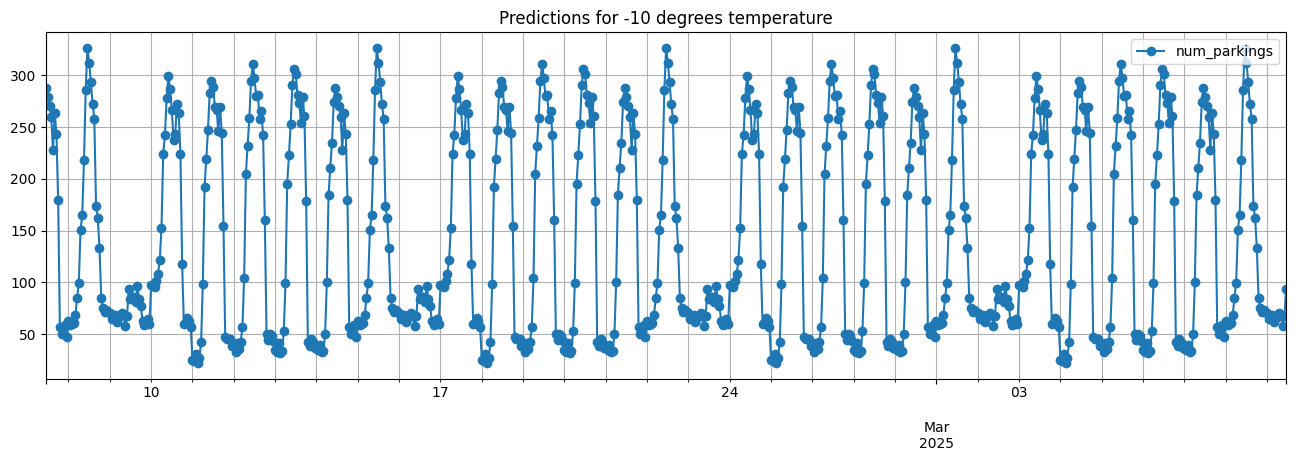

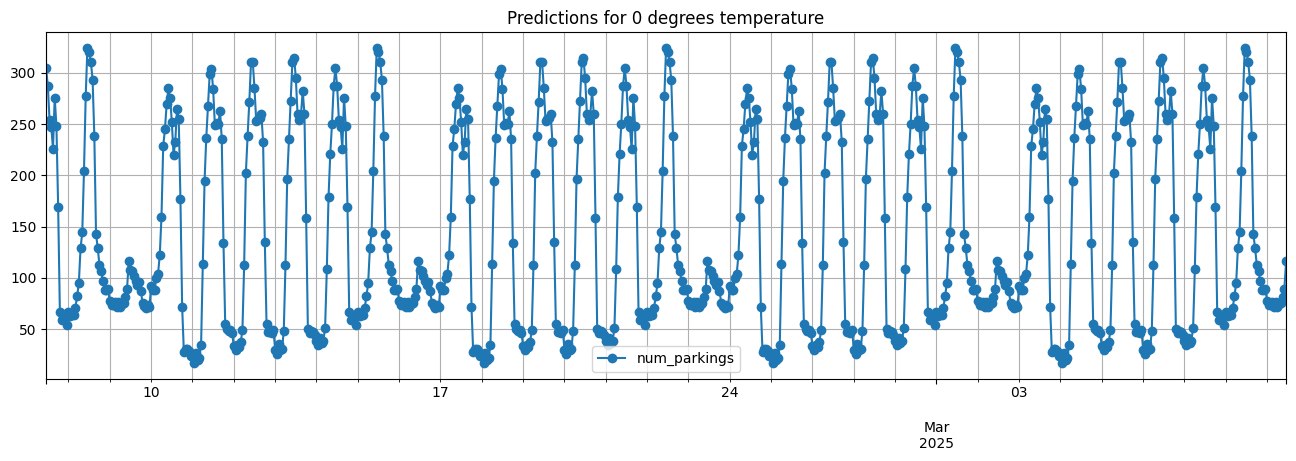

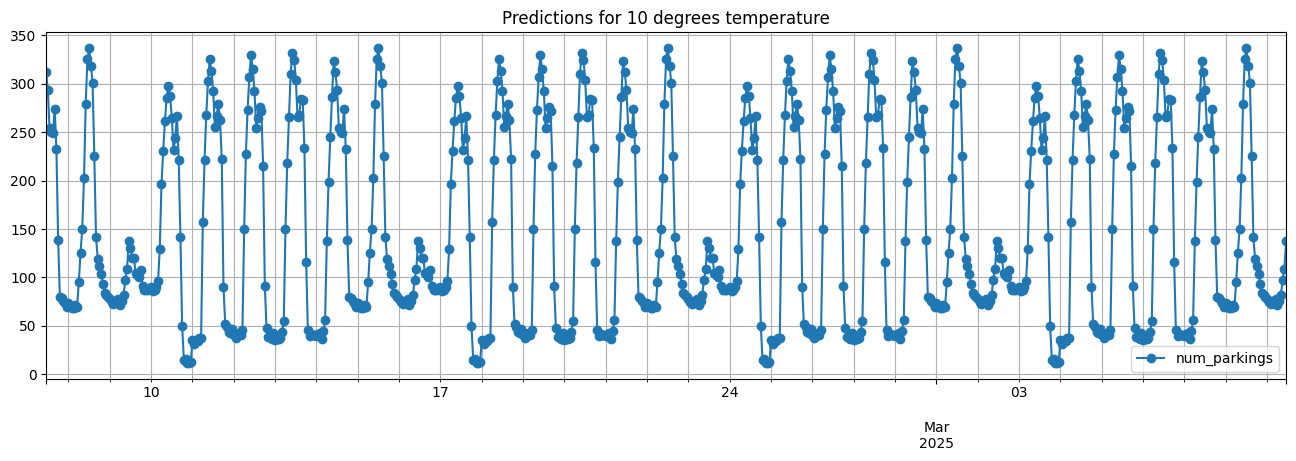

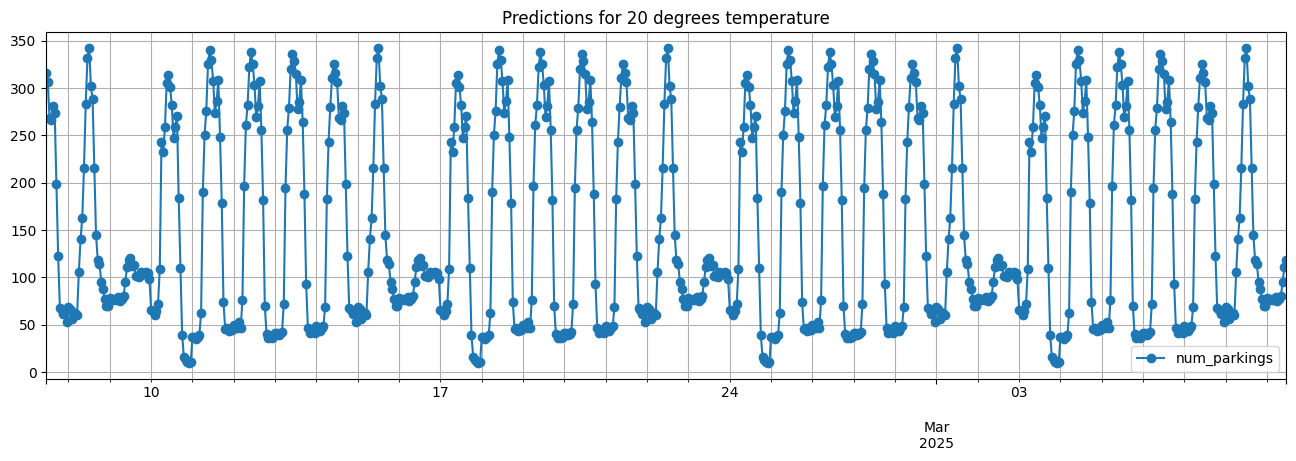

In [4]:
results = {}
date_range = pd.date_range(start="2025-02-07 11:00:00", end="2025-03-09 11:00:00", freq="h")
results[BASE] = predict(pipeline, date_range)
results[RAIN] = predict(pipeline_rain, date_range, rain=True)
results[DRY_WEATHER] = predict(pipeline_rain, date_range, rain=False)
results[MINUS_20] = predict(pipeline_temperature, date_range, temperature=-20)
results[MINUS_10] = predict(pipeline_temperature, date_range, temperature=-10)
results[ZERO] = predict(pipeline_temperature, date_range, temperature=0)
results[PLUS_10] = predict(pipeline_temperature, date_range, temperature=10)
results[PLUS_20] = predict(pipeline_temperature, date_range, temperature=20)
print_results(date_range, results)
draw_results(results)